In [78]:
def get_exp_variables_from_filename(exp_file):
    split_train = exp_file.split("_train_")
    exp_struct = split_train[0]
    split_test = split_train[1].split("_test_")
    test = split_test[1].split(".csv")[0]
    train_dates = split_test[0].split("_")
    return {"structure":exp_struct, "test_date":test, "train_dates":train_dates}

In [79]:
%matplotlib inline

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

BASEPATH = os.path.join("csvs","exp")
files = [f for f in os.listdir(BASEPATH) if os.path.isfile(os.path.join(BASEPATH, f))]
x = 'Microtubules_train_27-02-2017_14-03-2017_01-03-2017-03-03_2017_test_03-03-2017.csv'
# files.pop(files.index('predictions_day_to_day_random.csv'))

list_exp_points = {}
for exp in files:
    exp_path = os.path.join(BASEPATH,exp)
    df = pd.read_csv(exp_path)
    column_name = None
    for col in df.columns: 
        if 'corr_coef' in col:
            column_name = col
    exp_metadata =  get_exp_variables_from_filename(exp)
    list_exp_points[exp] = {'values':df[column_name].values , 'mean': df[column_name].mean()} 
    list_exp_points[exp].update(exp_metadata)
    


In [80]:
list_exp_points

{'Microtubules_train_01-03-2017_01-03-2017_01-03-2017_test_03-03-2017.csv': {'values': array([0.66309869, 0.70045066, 0.66393483, 0.62216073, 0.64665258,
         0.69338089, 0.6274488 , 0.60041982, 0.59851342, 0.69352955]),
  'mean': 0.6509589970111846,
  'structure': 'Microtubules',
  'test_date': '03-03-2017',
  'train_dates': ['01-03-2017', '01-03-2017', '01-03-2017']},
 'Microtubules_train_14-03-2017_14-03-2017_14-03-2017_test_03-03-2017.csv': {'values': array([0.63982898, 0.70649421, 0.73588127, 0.68033981, 0.56469202,
         0.64321834, 0.5648132 , 0.59329939, 0.53153658, 0.71088743]),
  'mean': 0.6370991230010986,
  'structure': 'Microtubules',
  'test_date': '03-03-2017',
  'train_dates': ['14-03-2017', '14-03-2017', '14-03-2017']},
 'Microtubules_train_27-02-2017_14-03-2017_01-03-2017-03-03_2017_test_03-03-2017.csv': {'values': array([0.72641629, 0.70383811, 0.77038342, 0.70693368, 0.73202813,
         0.76390153, 0.70170951, 0.72798944, 0.68593729, 0.79083115]),
  'mean': 

In [81]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [82]:
random_dict = list_exp_points.pop(x)  


In [83]:
x_items = []
for key,items in list_exp_points.items():
    x_items = np.concatenate((x_items, random_dict['values']), axis=0)
y_items = []
for key,item in list_exp_points.items():
    y_items = np.concatenate((y_items, item['values']), axis=0)

train_dates = []
for key,item in list_exp_points.items():
    for value in item['values']:
        train_dates.append('_'.join(item['train_dates']))

In [84]:
x_name = random_dict['test_date']

In [85]:
x_random =x_items
dictionary = {"all_training":y_items, x_name:x_random, "train_dates":train_dates}

df = pd.DataFrame(dictionary)
df.head

<bound method NDFrame.head of     all_training  03-03-2017                       train_dates
0       0.663099    0.726416  01-03-2017_01-03-2017_01-03-2017
1       0.700451    0.703838  01-03-2017_01-03-2017_01-03-2017
2       0.663935    0.770383  01-03-2017_01-03-2017_01-03-2017
3       0.622161    0.706934  01-03-2017_01-03-2017_01-03-2017
4       0.646653    0.732028  01-03-2017_01-03-2017_01-03-2017
5       0.693381    0.763902  01-03-2017_01-03-2017_01-03-2017
6       0.627449    0.701710  01-03-2017_01-03-2017_01-03-2017
7       0.600420    0.727989  01-03-2017_01-03-2017_01-03-2017
8       0.598513    0.685937  01-03-2017_01-03-2017_01-03-2017
9       0.693530    0.790831  01-03-2017_01-03-2017_01-03-2017
10      0.639829    0.726416  14-03-2017_14-03-2017_14-03-2017
11      0.706494    0.703838  14-03-2017_14-03-2017_14-03-2017
12      0.735881    0.770383  14-03-2017_14-03-2017_14-03-2017
13      0.680340    0.706934  14-03-2017_14-03-2017_14-03-2017
14      0.564692    0.732

[(0.5, 0.8)]

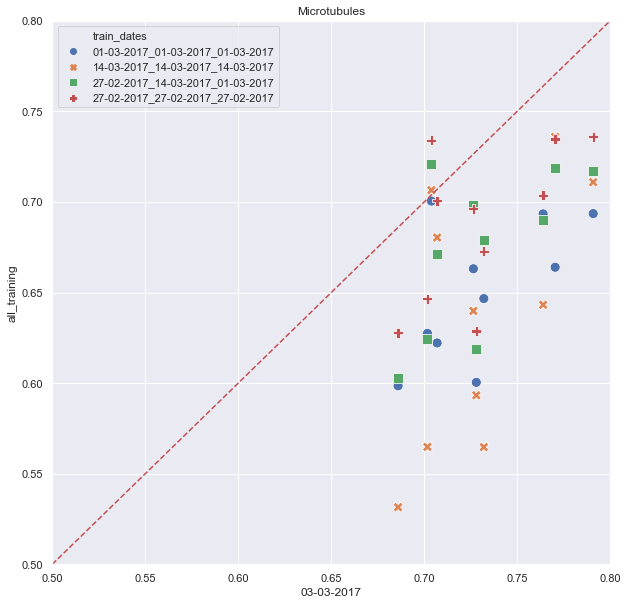

In [86]:
plt.figure(figsize=(10,10))
plt.xlabel('random_day_to_day')
plt.ylabel('training')
plt.title(random_dict['structure'])
ax = sns.scatterplot(x=f"{x_name}", y="all_training", hue="train_dates",
                     data=df,style="train_dates", s=100)
add_identity(ax, color='r', ls='--')
ax.set(ylim=(0.5, 0.8))
ax.set(xlim=(0.5, 0.8))


# sns.plt.ylim(0, 1)
# sns.plt.xlim(0, 1)


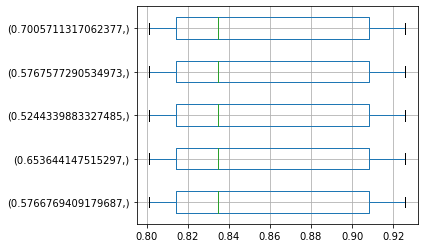

In [33]:
df = pd.DataFrame(x, index=[y])

df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()



In [39]:
x = [random_dict['mean'] for key,x in list_exp_points.items()]

In [43]:
y

[0.5766769409179687,
 0.653644147515297,
 0.5244339883327485,
 0.5767577290534973,
 0.7005711317062377]

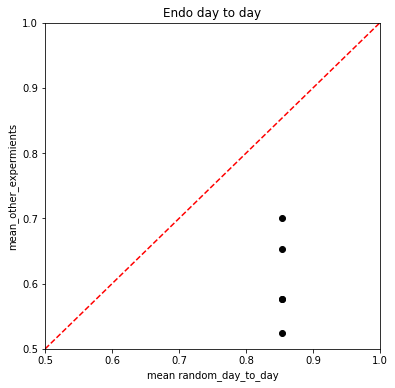

In [49]:
# x = [0.881864607,0.908546209,0.866875768,0.885993302,0.885260582,0.86404562,0.894176424,0.904748678,0.881487787,0.889926374]
# y = [0.917753637,0.922052443,0.891226292,0.928894699,0.924223304,0.937056959,0.941006541,0.916166127,0.90344286,0.899363339]

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, c=".01")
add_identity(ax, color='r', ls='--')
plt.xlim([0.5,1])
plt.ylim([0.5,1])
plt.xlabel('mean random_day_to_day')
plt.ylabel('mean_other_expermients')
plt.title('Endo day to day')
plt.show()

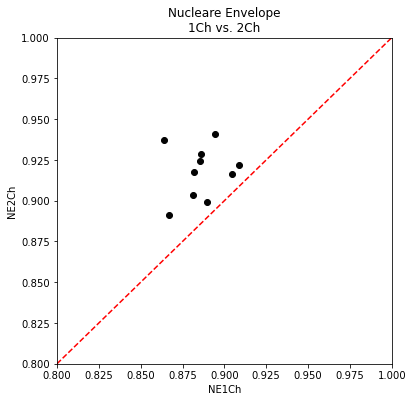

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x = [0.881864607,0.908546209,0.866875768,0.885993302,0.885260582,0.86404562,0.894176424,0.904748678,0.881487787,0.889926374]
y = [0.917753637,0.922052443,0.891226292,0.928894699,0.924223304,0.937056959,0.941006541,0.916166127,0.90344286,0.899363339]

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, c=".01")
add_identity(ax, color='r', ls='--')
plt.xlim([0.8,1])
plt.ylim([0.8,1])
plt.xlabel('NE1Ch')
plt.ylabel('NE2Ch')
plt.title('Nucleare Envelope\n1Ch vs. 2Ch')
plt.show()

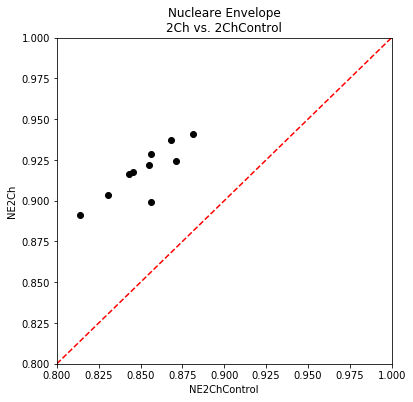

In [4]:
x = [0.845311224,0.85497117,0.814086258,0.85607338,0.870903075,0.867960989,0.881320059,0.843183935,0.830572128,0.856104434]
y = [0.917753637,0.922052443,0.891226292,0.928894699,0.924223304,0.937056959,0.941006541,0.916166127,0.90344286,0.899363339]

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, c=".01")
add_identity(ax, color='r', ls='--')
plt.xlim([0.8,1])
plt.ylim([0.8,1])
plt.xlabel('NE2ChControl')
plt.ylabel('NE2Ch')
plt.title('Nucleare Envelope\n2Ch vs. 2ChControl')
plt.show()

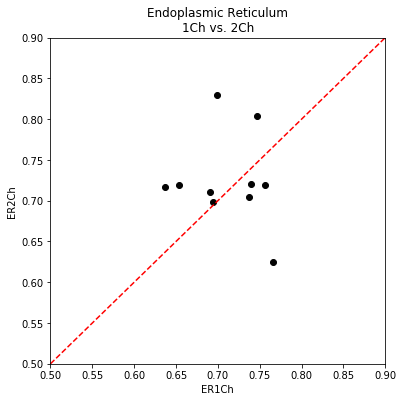

In [5]:
x = [0.698638856,0.747206628,0.637220144,0.739421964,0.693960488,0.736759722,0.691057622,0.756847918,0.765572965,0.653387249]
y = [0.829729974,0.804245234,0.71656239,0.720537007,0.698300838,0.704175889,0.710172415,0.71955806,0.624742866,0.719412267]

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, c=".01")
add_identity(ax, color='r', ls='--')
plt.xlim([0.5,0.9])
plt.ylim([0.5,0.9])
plt.xlabel('ER1Ch')
plt.ylabel('ER2Ch')
plt.title('Endoplasmic Reticulum\n1Ch vs. 2Ch')
plt.show()

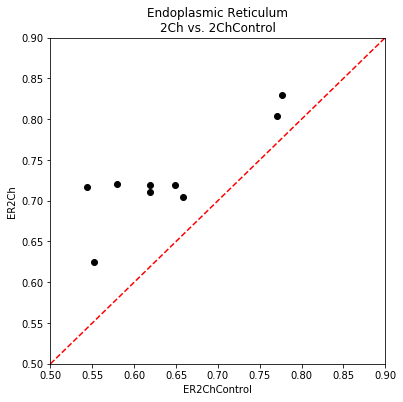

In [6]:
x = [0.776533544,0.771115363,0.543925822,0.579688549,0.489293426,0.657846391,0.619339943,0.648599386,0.551791787,0.618663251]
y =  [0.829729974,0.804245234,0.71656239,0.720537007,0.698300838,0.704175889,0.710172415,0.71955806,0.624742866,0.719412267]

f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, c=".01")
add_identity(ax, color='r', ls='--')
plt.xlim([0.5,0.9])
plt.ylim([0.5,0.9])
plt.xlabel('ER2ChControl')
plt.ylabel('ER2Ch')
plt.title('Endoplasmic Reticulum\n2Ch vs. 2ChControl')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

<Figure size 640x480 with 6 Axes>

<Figure size 640x480 with 1 Axes>

In [18]:
Lysosome = [0.56749332,0.629852355,0.296394765,0.140225992,0.24065651,0.171697795,0.273171246,0.160932317,0.118535772,0.151774749]
Mitochondria = [0.687301397,0.679230154,0.643301785,0.718633473,0.727949262,0.697023332,0.726897538,0.632117391,0.696023405,0.69911778]
Microtubules = [0.79989171,0.789925396,0.790943563,0.75358218,0.736254811,0.711972415,0.794625223,0.784357309,0.738797486,0.826669872]
Actin_filaments = [0.753895044,0.684839964,0.790091813,0.732854068,0.659946084,0.696615636,0.774647474,0.729173124,0.755442441,0.729514003]
Gap_junctions = [0.186977819,0.184903398,0.196574494,0.188679412,0.175011635,0.225436792,0.194328308,0.156885862,0.183573082,0.175828457]
Desmosomes = [0.008024724,0.007302549,0.007840469,0.013225446,0.008032109,0.006898124,0.008459728,0.010644077,0.008908404,0.00806006]
Nuclear_envelope = [0.881864607,0.908546209,0.866875768,0.885993302,0.885260582,0.86404562,0.894176424,0.904748678,0.881487787,0.889926374]
Endoplasmic_reticulum = [0.698638856,0.747206628,0.637220144,0.739421964,0.693960488,0.736759722,0.691057622,0.756847918,0.765572965,0.653387249]
Golgi = [0.044784699,0.073533222,0.039025899,0.060143448,0.040314775,0.060965557,0.061019581,0.073479399,0.065273464,0.044452261]
Tight_junctions = [0.616285503,0.628735721,0.125935927,0.095576294,0.099880025,0.115131475,0.120791316,0.111424454,0.09457165,0.108846769,]
Actomyosin_bundles = [0.387727559,0.432144821,0.449070126,0.295143962,0.413068146,0.334893018,0.411502153,0.419401735,0.398445785,0.301056057]
Nucleolus_DFC = [0.695663333,0.787333012,0.863368332,0.838238239,0.801263988,0.819226503,0.822062254,0.764892161,0.771662116,0.817545533]
Peroxisomes = [0.04933624,0.043500047,0.044003401,0.043451395,0.053201184,0.045118485,0.058098003,0.041246038,0.049684774,0.040773936]
data = [Nuclear_envelope,
        Nucleolus_DFC,
        Microtubules,
        Actin_filaments,
        Endoplasmic_reticulum,
        Mitochondria,
        Actomyosin_bundles,
        Lysosome,
        Gap_junctions,
        Tight_junctions,
        Peroxisomes,
        Golgi,
        Desmosomes,
        ]

13


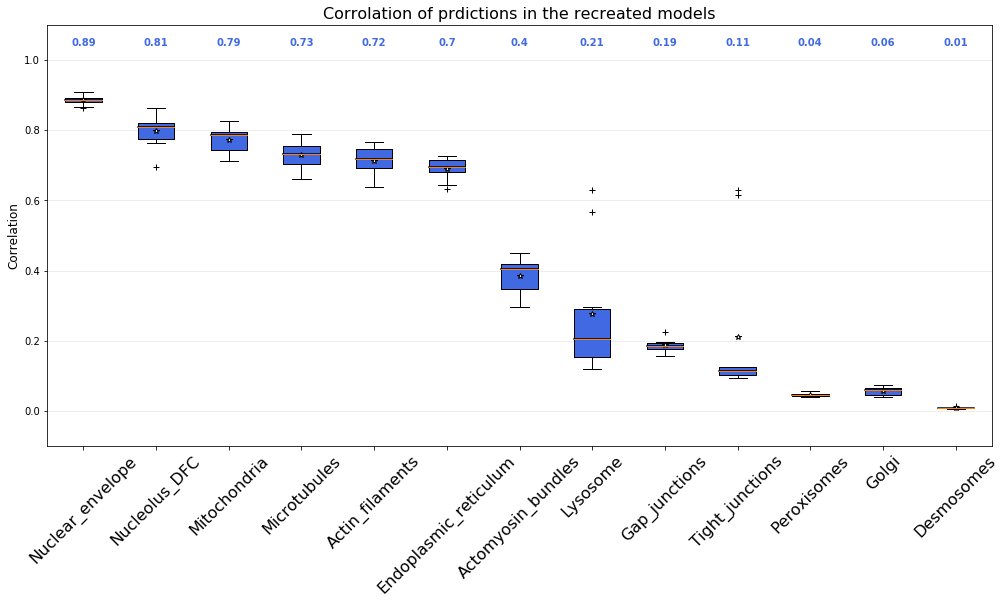

In [19]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
fig, ax1 = plt.subplots(figsize=(15, 9))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Corrolation of prdictions in the recreated models',fontsize=16)
ax1.set_ylabel('Correlation',fontsize=12)

# Now fill the boxes with desired colors
box_colors = ['royalblue']
num_boxes = len(data)
print (len(data))
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor='royalblue'))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 1.1
bottom = -0.1
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(["Nuclear_envelope","Nucleolus_DFC","Mitochondria","Microtubules", "Actin_filaments", "Endoplasmic_reticulum", "Actomyosin_bundles",
                     "Lysosome", "Gap_junctions", "Tight_junctions","Peroxisomes","Golgi", "Desmosomes"],rotation=45, fontsize=16)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color='royalblue', fontsize=10)

plt.show()